In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('dengue_features_train.csv')
df_label = pd.read_csv('dengue_labels_train.csv')
data = pd.merge(df, df_label, on = ['city','year','weekofyear'], how = 'left')

In [4]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [6]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
sj_data = data[data['city'] == 'sj']
iq_data = data[data['city'] == 'iq']

In [8]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanal

In [9]:
sj_data['ndvi_se'] = sj_data['ndvi_se'].fillna(method = 'ffill')
sj_data['ndvi_sw'] = sj_data['ndvi_sw'].fillna(method = 'ffill')
sj_data['ndvi_ne'] = sj_data['ndvi_ne'].fillna(method = 'ffill')
sj_data['ndvi_nw'] = sj_data['ndvi_nw'].fillna(method = 'ffill')

In [10]:
sj_data['reanalysis_air_temp_k'] = sj_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_avg_temp_k'] = sj_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_dew_point_temp_k'] =sj_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_max_air_temp_k'] = sj_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_min_air_temp_k'] = sj_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')

In [11]:
sj_data['reanalysis_precip_amt_kg_per_m2'] = sj_data['reanalysis_precip_amt_kg_per_m2'].fillna(method='ffill')
sj_data['reanalysis_relative_humidity_percent'] = sj_data['reanalysis_relative_humidity_percent'].fillna(method='ffill')
sj_data['reanalysis_sat_precip_amt_mm'] = sj_data['reanalysis_sat_precip_amt_mm'].fillna(method='ffill')
sj_data['reanalysis_tdtr_k'] = sj_data['reanalysis_tdtr_k'].fillna(method='ffill')
sj_data['station_avg_temp_c'] = sj_data['station_avg_temp_c'].fillna(method='ffill')
sj_data['station_diur_temp_rng_c'] = sj_data['station_diur_temp_rng_c'].fillna(method='ffill')
sj_data['station_precip_mm'] = sj_data['station_precip_mm'].fillna(method='ffill')

In [12]:
sj_data['avg_reanalysis'] = sj_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

In [13]:
sj_data['avg_ndvi'] = sj_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [14]:
# sj_data.info()

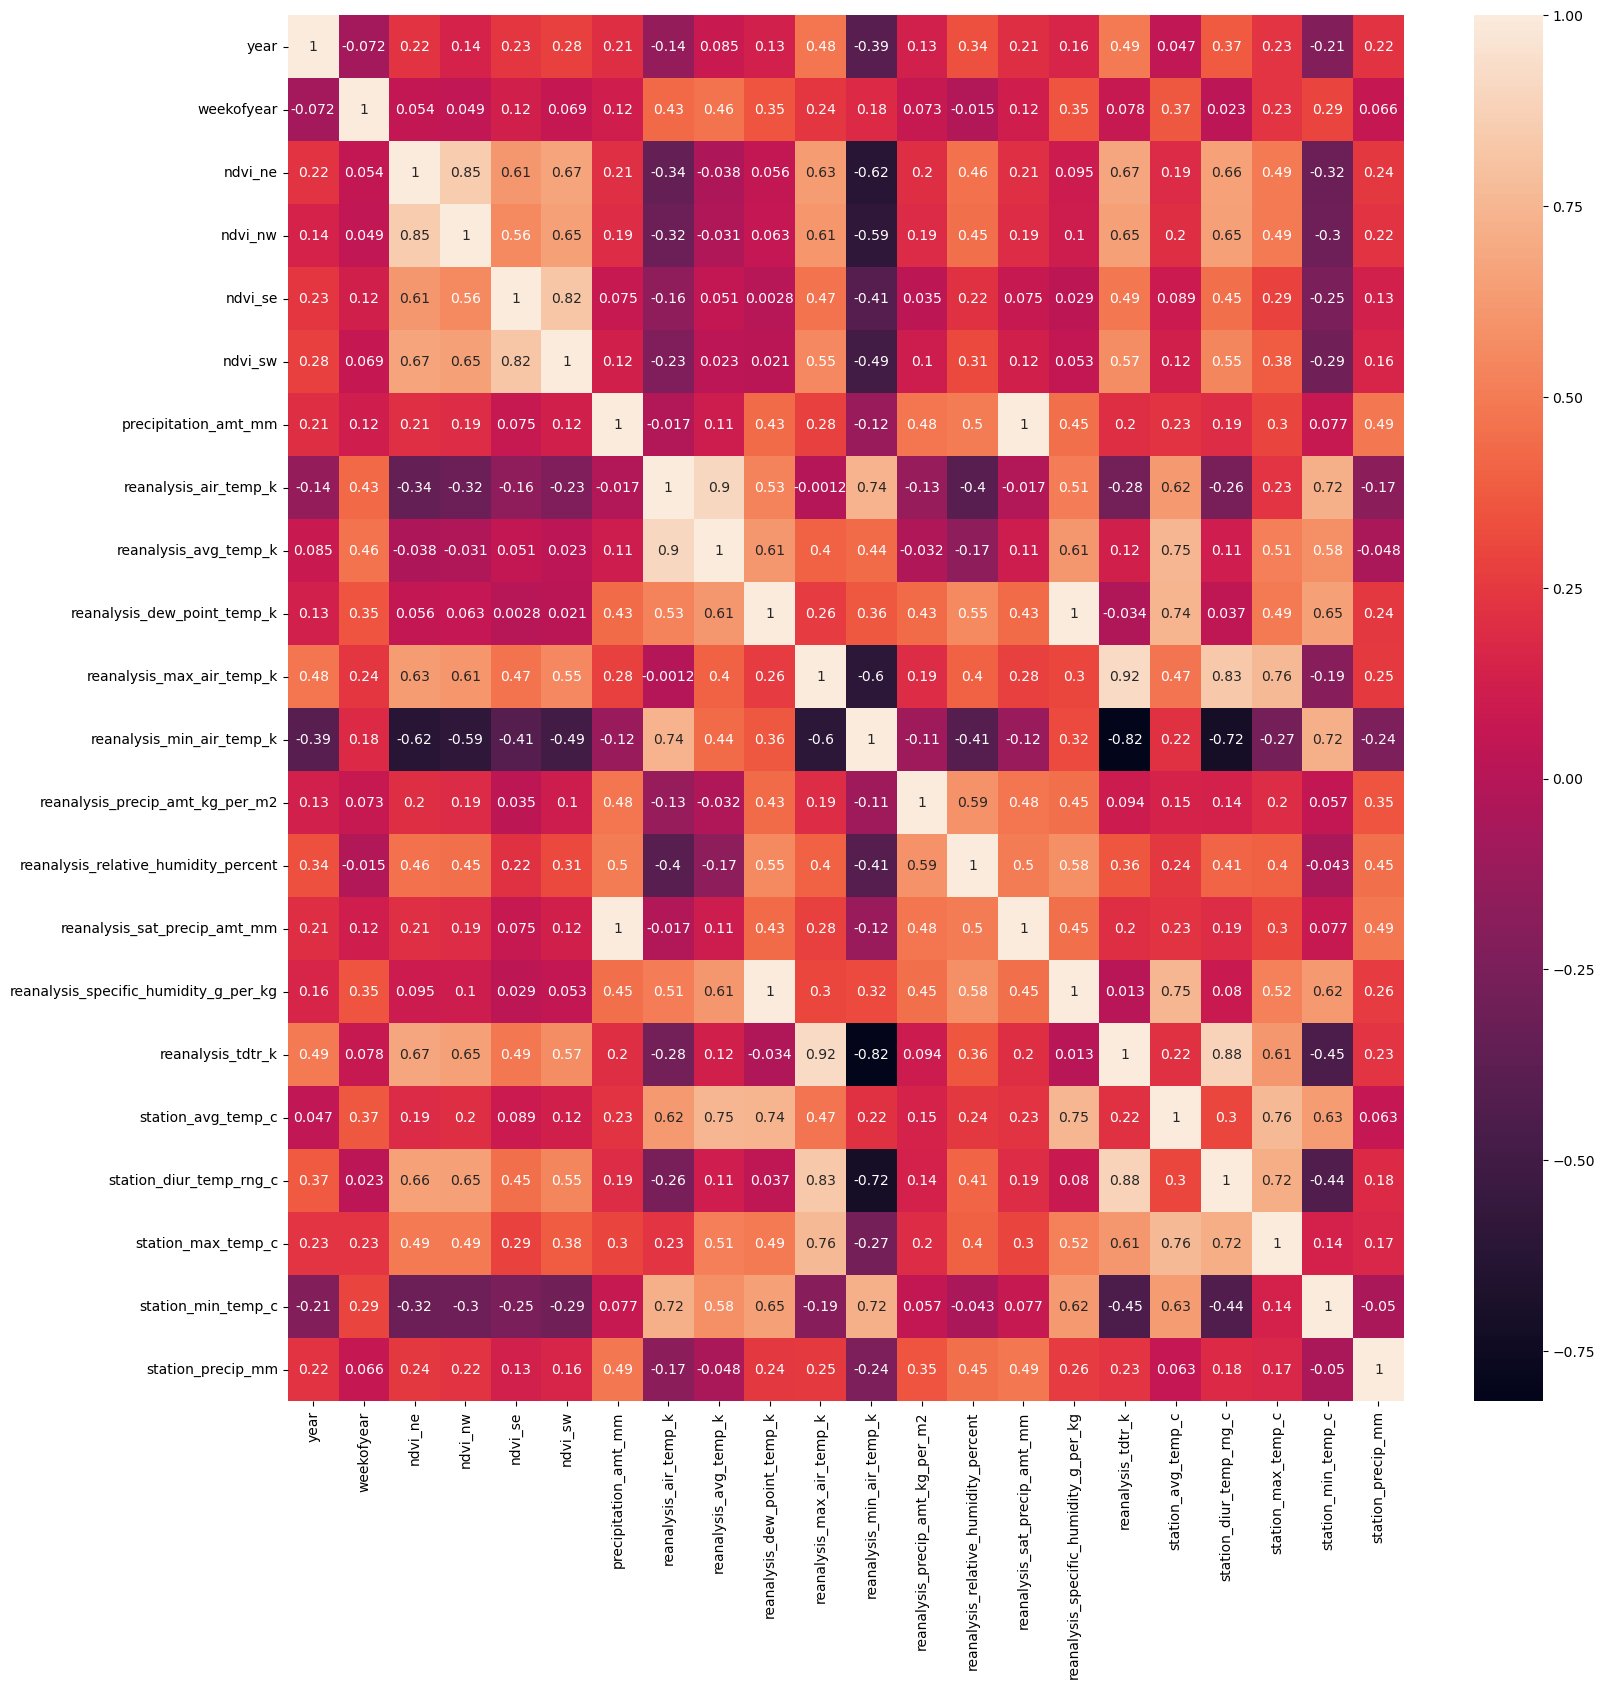

In [15]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [16]:
sj_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,296.686000,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,297.581143,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,298.178857,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,298.385143,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,298.880857,0.239235


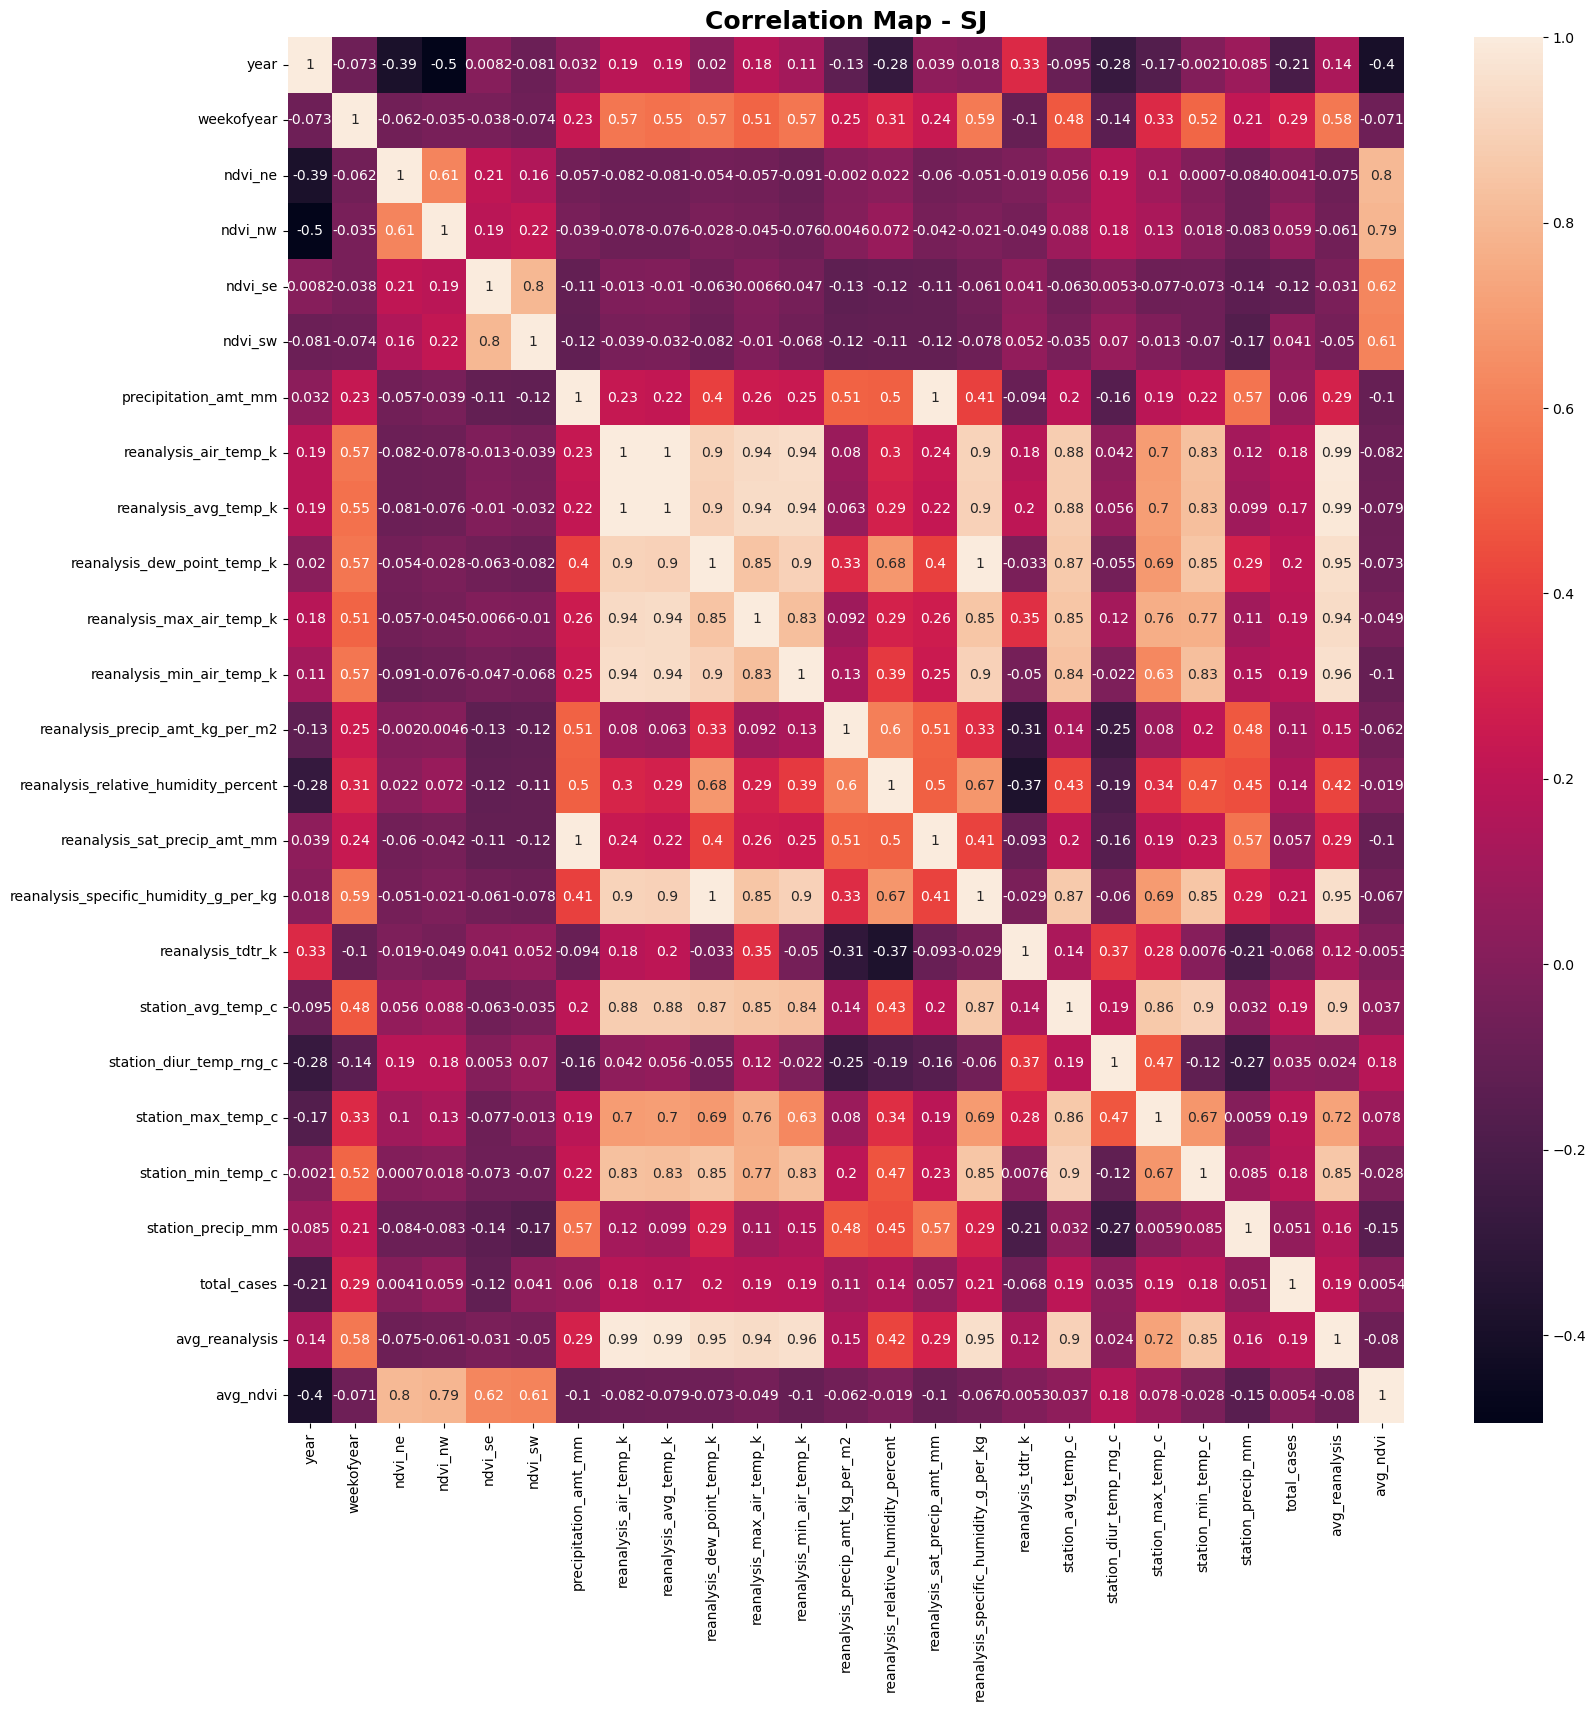

In [17]:
plt.figure(figsize = (18,18))
plt.title("Correlation Map - SJ", fontweight = 'bold', fontsize = 18)
sns.heatmap(sj_data.corr(),annot = True)
plt.show()

In [18]:
sj_data.drop(['city','year','week_start_date','reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k',
              'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k'] ,
             axis = 1, inplace = True)

In [19]:
sj_data.drop(['ndvi_sw', 'ndvi_se','ndvi_ne','ndvi_nw', 'weekofyear', 'precipitation_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
              'station_min_temp_c', 'station_max_temp_c','station_avg_temp_c'] , axis = 1, inplace = True)


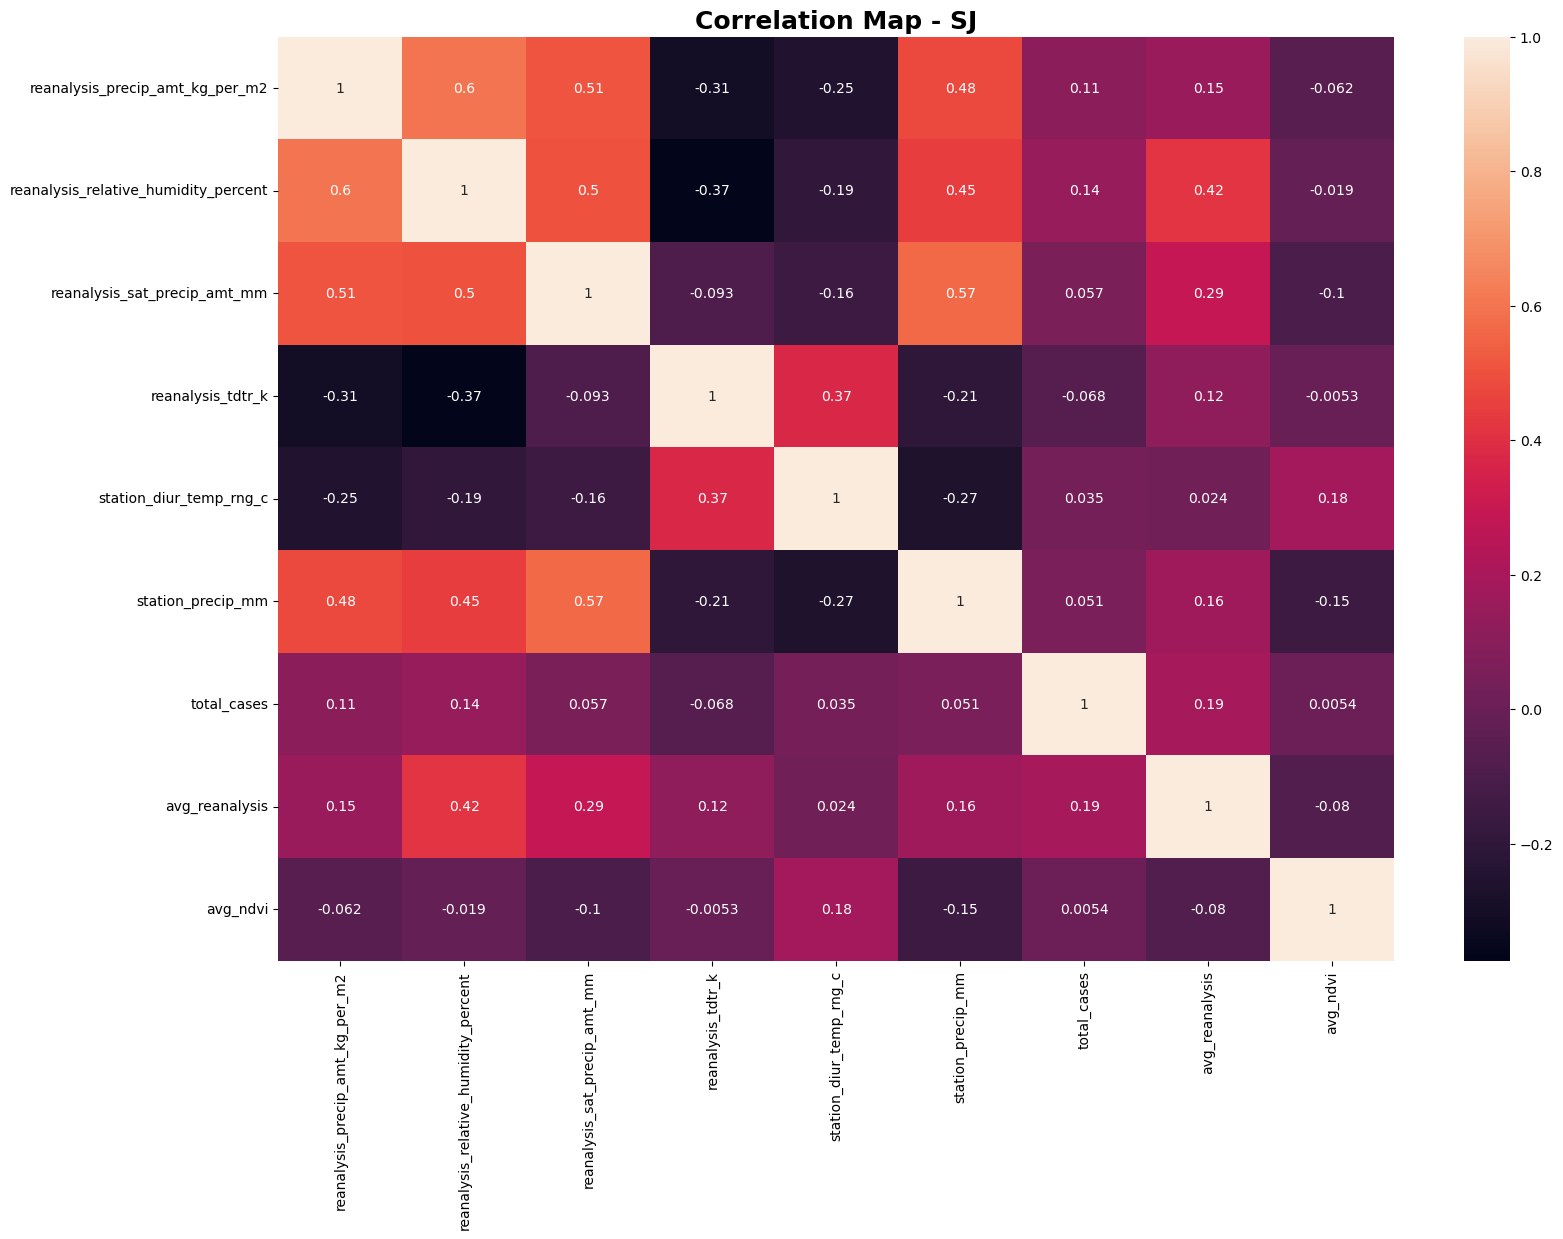

In [20]:
plt.figure(figsize = (18,12))
plt.title("Correlation Map - SJ", fontweight = 'bold', fontsize = 18)
sns.heatmap(sj_data.corr(),annot = True)
plt.show()

<AxesSubplot:>

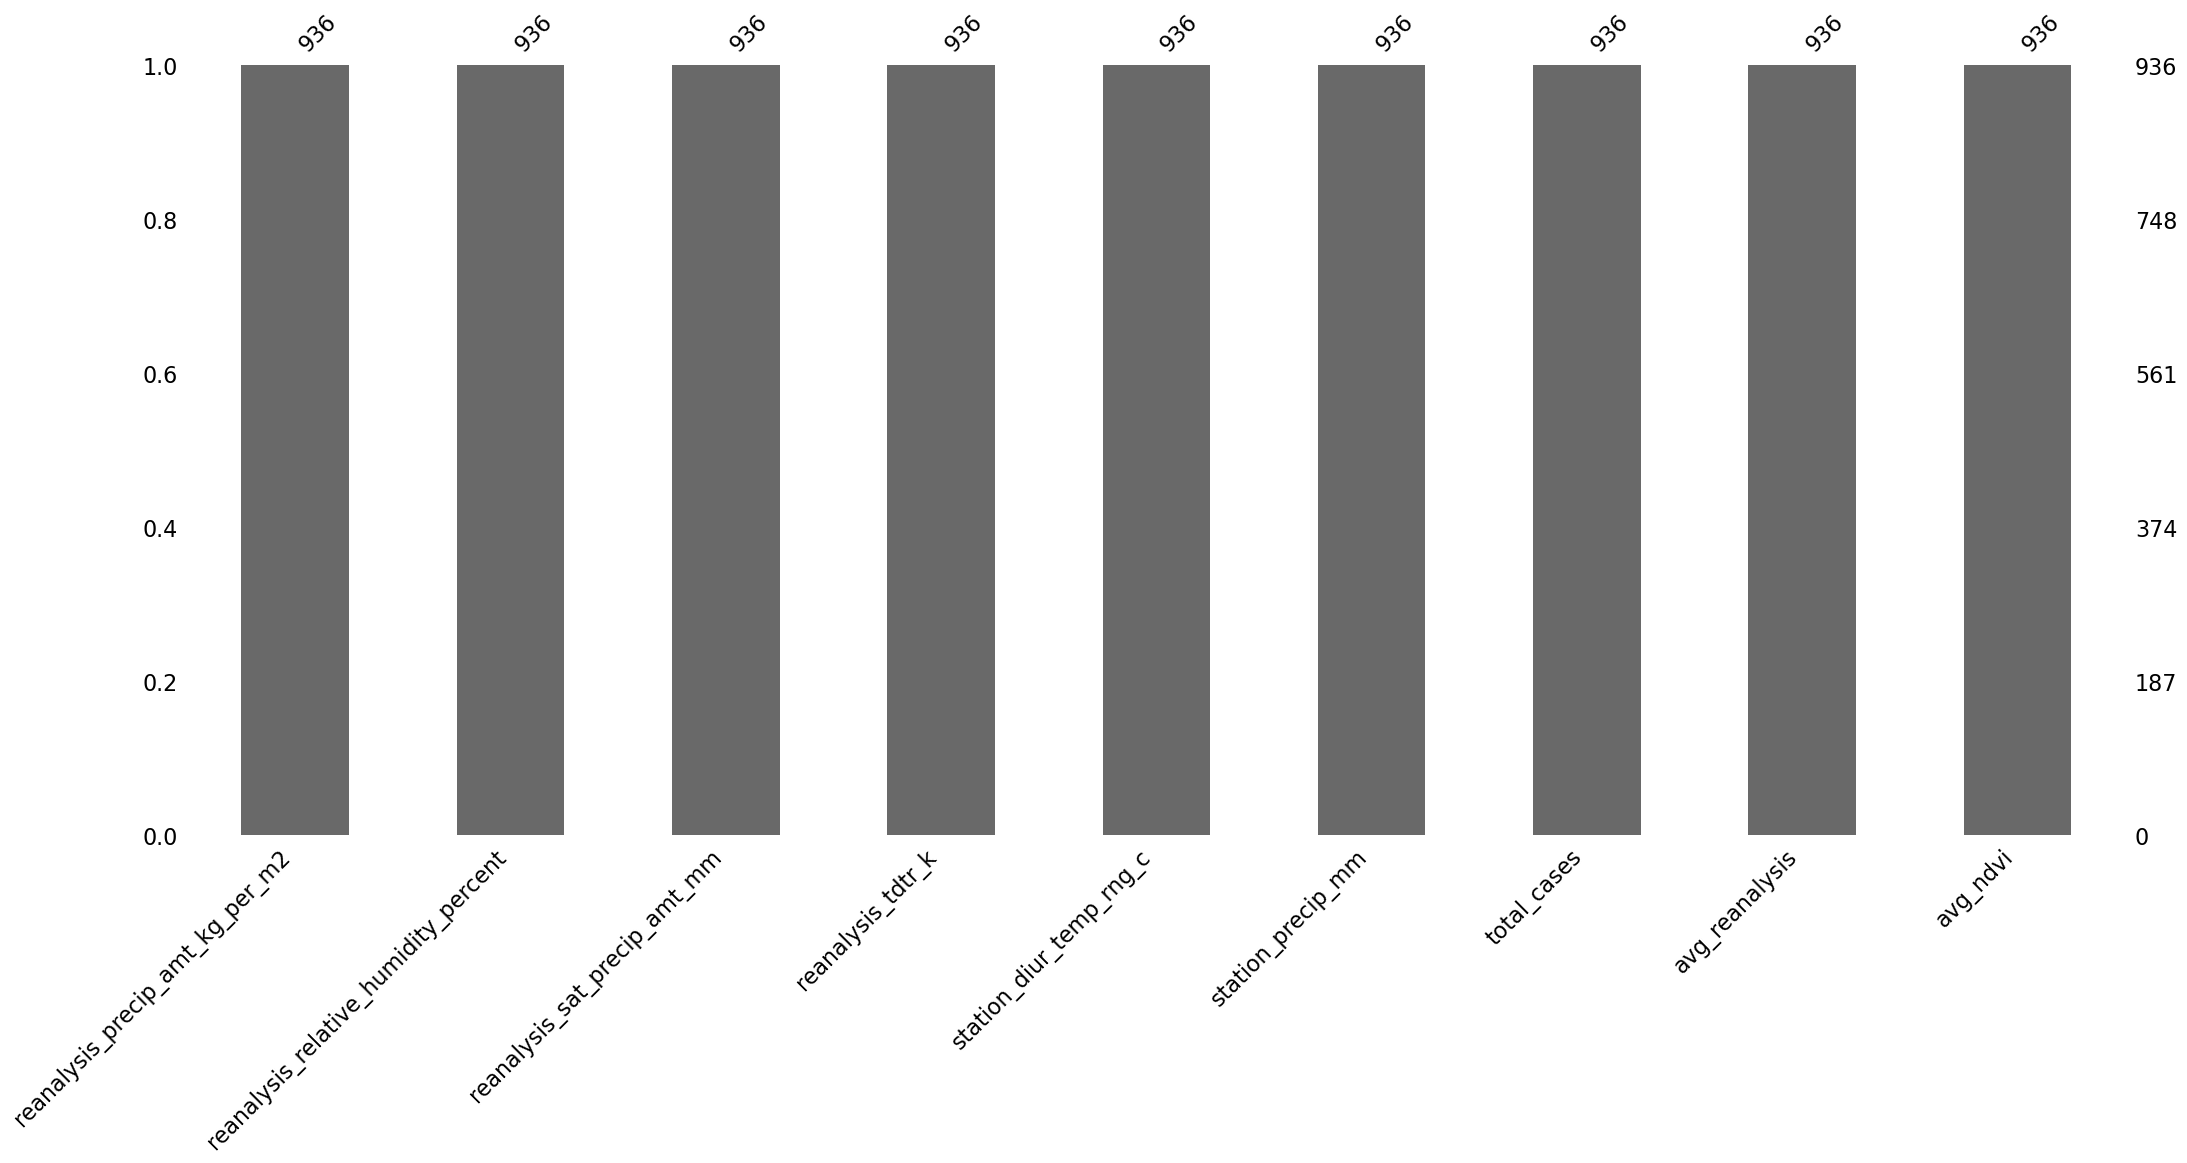

In [21]:
import missingno as msno
msno.bar(sj_data)

<AxesSubplot:xlabel='avg_ndvi', ylabel='Density'>

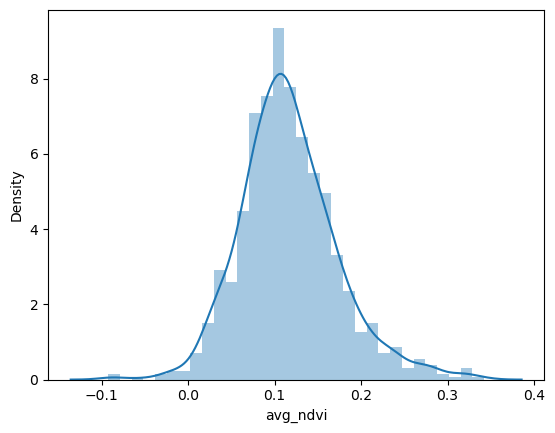

In [22]:
# seems normal, so we can fill the na values with mean
sns.distplot(sj_data['avg_ndvi'])

In [23]:
sj_data.isna().sum()

reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_sat_precip_amt_mm            0
reanalysis_tdtr_k                       0
station_diur_temp_rng_c                 0
station_precip_mm                       0
total_cases                             0
avg_reanalysis                          0
avg_ndvi                                0
dtype: int64

In [24]:
sj_data.head()

,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
0,32.00,73.365714,12.42,2.628571,6.900000,16.0,4,296.686000,0.150606
1,17.94,77.368571,22.82,2.371429,6.371429,8.6,5,297.581143,0.157479
2,26.10,82.052857,34.54,2.300000,6.485714,41.4,4,298.178857,0.133315
3,13.90,80.337143,15.36,2.428571,6.771429,4.0,3,298.385143,0.209286
4,12.20,80.460000,7.52,3.014286,9.371429,5.8,6,298.880857,0.239235


## Modeling

In [25]:
from sklearn.model_selection import train_test_split

X = sj_data.drop('total_cases', axis = 1)
y = sj_data.total_cases

X_train, X_test, y_train, y_val  = train_test_split(X, y, test_size= 0.2)

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.tree import DecisionTreeRegressor

dl = DecisionTreeRegressor()
dl.fit(X_train, y_train)
pred_dl = dl.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_val, pred_dl))

37.723404255319146


In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))


30.2967774822695


In [30]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {  'bootstrap': [True], 
#                 'max_depth': [5, 10, None], 
#                 'max_features': ['auto', 'log2','sqrt'], 
#                 'n_estimators': [10, 50, 100, 150, 200],
#                 'min_samples_split': [2, 5, 10, 15, 100],
#                 'min_samples_leaf' : [1, 2, 5, 10]
# }

# rfr_gc = RandomForestRegressor()

# g_search = GridSearchCV(estimator = rfr_gc, param_grid = param_grid, 

#                           cv = 3, n_jobs = 1, verbose = 0, return_train_score=True, refit = True)

# g_search.fit(X_train, y_train)
# pred_rfr_gs = g_search.predict(X_test)


# print(g_search.best_params_)
# print(mean_absolute_error(y_val, pred_rfr_gs))

## Trying with only 2 features

In [30]:
features = ['avg_reanalysis', 
                 'avg_ndvi']

In [31]:
sj_data.columns

Index(['reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_precip_mm',
       'total_cases', 'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [32]:
X = sj_data[features]
y = sj_data.total_cases

X_train, X_test, y_train, y_val  = train_test_split(X, y, test_size= 0.2)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))


25.643816489361704


In [35]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {  'bootstrap': [True], 
#                 'max_depth': [5, 10, None], 
#                 'max_features': ['auto', 'log2','sqrt'], 
#                 'n_estimators': [10, 50, 100, 150, 200],
#                 'min_samples_split': [2, 5, 10, 15, 100],
#                 'min_samples_leaf' : [1, 2, 5, 10]
# }

# rfr_gc = RandomForestRegressor()

# g_search = GridSearchCV(estimator = rfr_gc, param_grid = param_grid, 

#                           cv = 3, n_jobs = 1, verbose = 0, return_train_score=True, refit = True)

# g_search.fit(X_train, y_train)
# pred_rfr_gs = g_search.predict(X_test)


# print(g_search.best_params_)
# print(mean_absolute_error(y_val, pred_rfr_gs))

# Feature Selection Methods

## PCA

In [88]:
X = sj_data.drop('total_cases', axis = 1)
y = sj_data.total_cases

X_train, X_test, y_train, y_val  = train_test_split(X, y, test_size= 0.2)

In [72]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))


31.92266679331307


## Select K-Best chi_square

In [122]:
X = sj_data.drop('total_cases', axis = 1)
y = sj_data.total_cases

In [123]:
Xcopy = X.copy()

In [124]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [125]:
print(X)

[[0.056 0.318 0.032 ... 0.052 0.292 0.559]
 [0.031 0.51  0.058 ... 0.028 0.43  0.575]
 [0.046 0.735 0.088 ... 0.135 0.522 0.519]
 ...
 [0.061 0.398 0.043 ... 0.1   0.277 0.254]
 [0.008 0.266 0.    ... 0.037 0.287 0.421]
 [0.004 0.491 0.    ... 0.001 0.447 0.282]]


In [126]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [127]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[10.15   6.771 20.766 11.772  5.867 14.027 11.262  4.444]
[[0.032 0.414 0.052 0.292]
 [0.058 0.33  0.028 0.43 ]
 [0.088 0.307 0.135 0.522]
 [0.039 0.349 0.013 0.554]
 [0.019 0.54  0.019 0.631]]


In [128]:
## Four best features are : 3,4,6,7.

In [129]:
Xcopy.head()

,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,avg_reanalysis,avg_ndvi
0,32.00,73.365714,12.42,2.628571,6.900000,16.0,296.686000,0.150606
1,17.94,77.368571,22.82,2.371429,6.371429,8.6,297.581143,0.157479
2,26.10,82.052857,34.54,2.300000,6.485714,41.4,298.178857,0.133315
3,13.90,80.337143,15.36,2.428571,6.771429,4.0,298.385143,0.209286
4,12.20,80.460000,7.52,3.014286,9.371429,5.8,298.880857,0.239235


In [130]:
Xcopy.columns

Index(['reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_precip_mm',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [131]:
imp_feat = ['reanalysis_sat_precip_amt_mm','reanalysis_tdtr_k','station_precip_mm','avg_reanalysis']

In [132]:
X.shape

(936, 8)

In [134]:
X = sj_data[imp_feat]
y = sj_data.total_cases

X_train = X[:760]
X_test = X[760:]
y_train = y[:760]
y_val  = y[760:]

In [135]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))


27.82054288419914


## Select K-Best f_regression

In [141]:
X = sj_data.drop('total_cases', axis = 1)
y = sj_data.total_cases

Xcopy = X.copy()

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression

# Feature extraction
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
print(sorted(fit.scores_))

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])



[1.073e+01 1.931e+01 3.038e+00 4.329e+00 1.133e+00 2.420e+00 3.659e+01
 2.756e-02]
[0.02755994444178334, 1.1325422074470013, 2.419894417264919, 3.0382976296319666, 4.328570600881494, 10.733673440893208, 19.308423292162676, 36.59176102304555]
[[0.056 0.318 0.414 0.292]
 [0.031 0.51  0.33  0.43 ]
 [0.046 0.735 0.307 0.522]
 [0.024 0.653 0.349 0.554]
 [0.021 0.659 0.54  0.631]]


In [142]:
## Four best features are : 1,2,7.

Xcopy.head()

Xcopy.columns

Index(['reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_precip_mm',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [150]:

imp_feat = ['reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','avg_reanalysis']

X.shape

X = sj_data[imp_feat]
y = sj_data.total_cases

X_train = X[:760]
X_test = X[760:]
y_train = y[:760]
y_val  = y[760:]

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))


30.573442775974026


In [151]:
X = sj_data.drop('total_cases', axis = 1)
y = sj_data.total_cases

Xcopy = X.copy()

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [159]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = RandomForestRegressor()
rfe = RFE(estimator = model, n_features_to_select=3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 3
Selected Features: [False  True False False False False  True  True]
Feature Ranking: [2 1 6 5 3 4 1 1]


In [160]:

Xcopy.head()

Xcopy.columns

Index(['reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_precip_mm',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [162]:
imp_feat = ['reanalysis_relative_humidity_percent','avg_reanalysis','avg_ndvi']

X.shape

X = sj_data[imp_feat]
y = sj_data.total_cases

X_train = X[:760]
X_test = X[760:]
y_train = y[:760]
y_val  = y[760:]

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))

26.36655735930736


### Taking these three features in time series now

## IQ

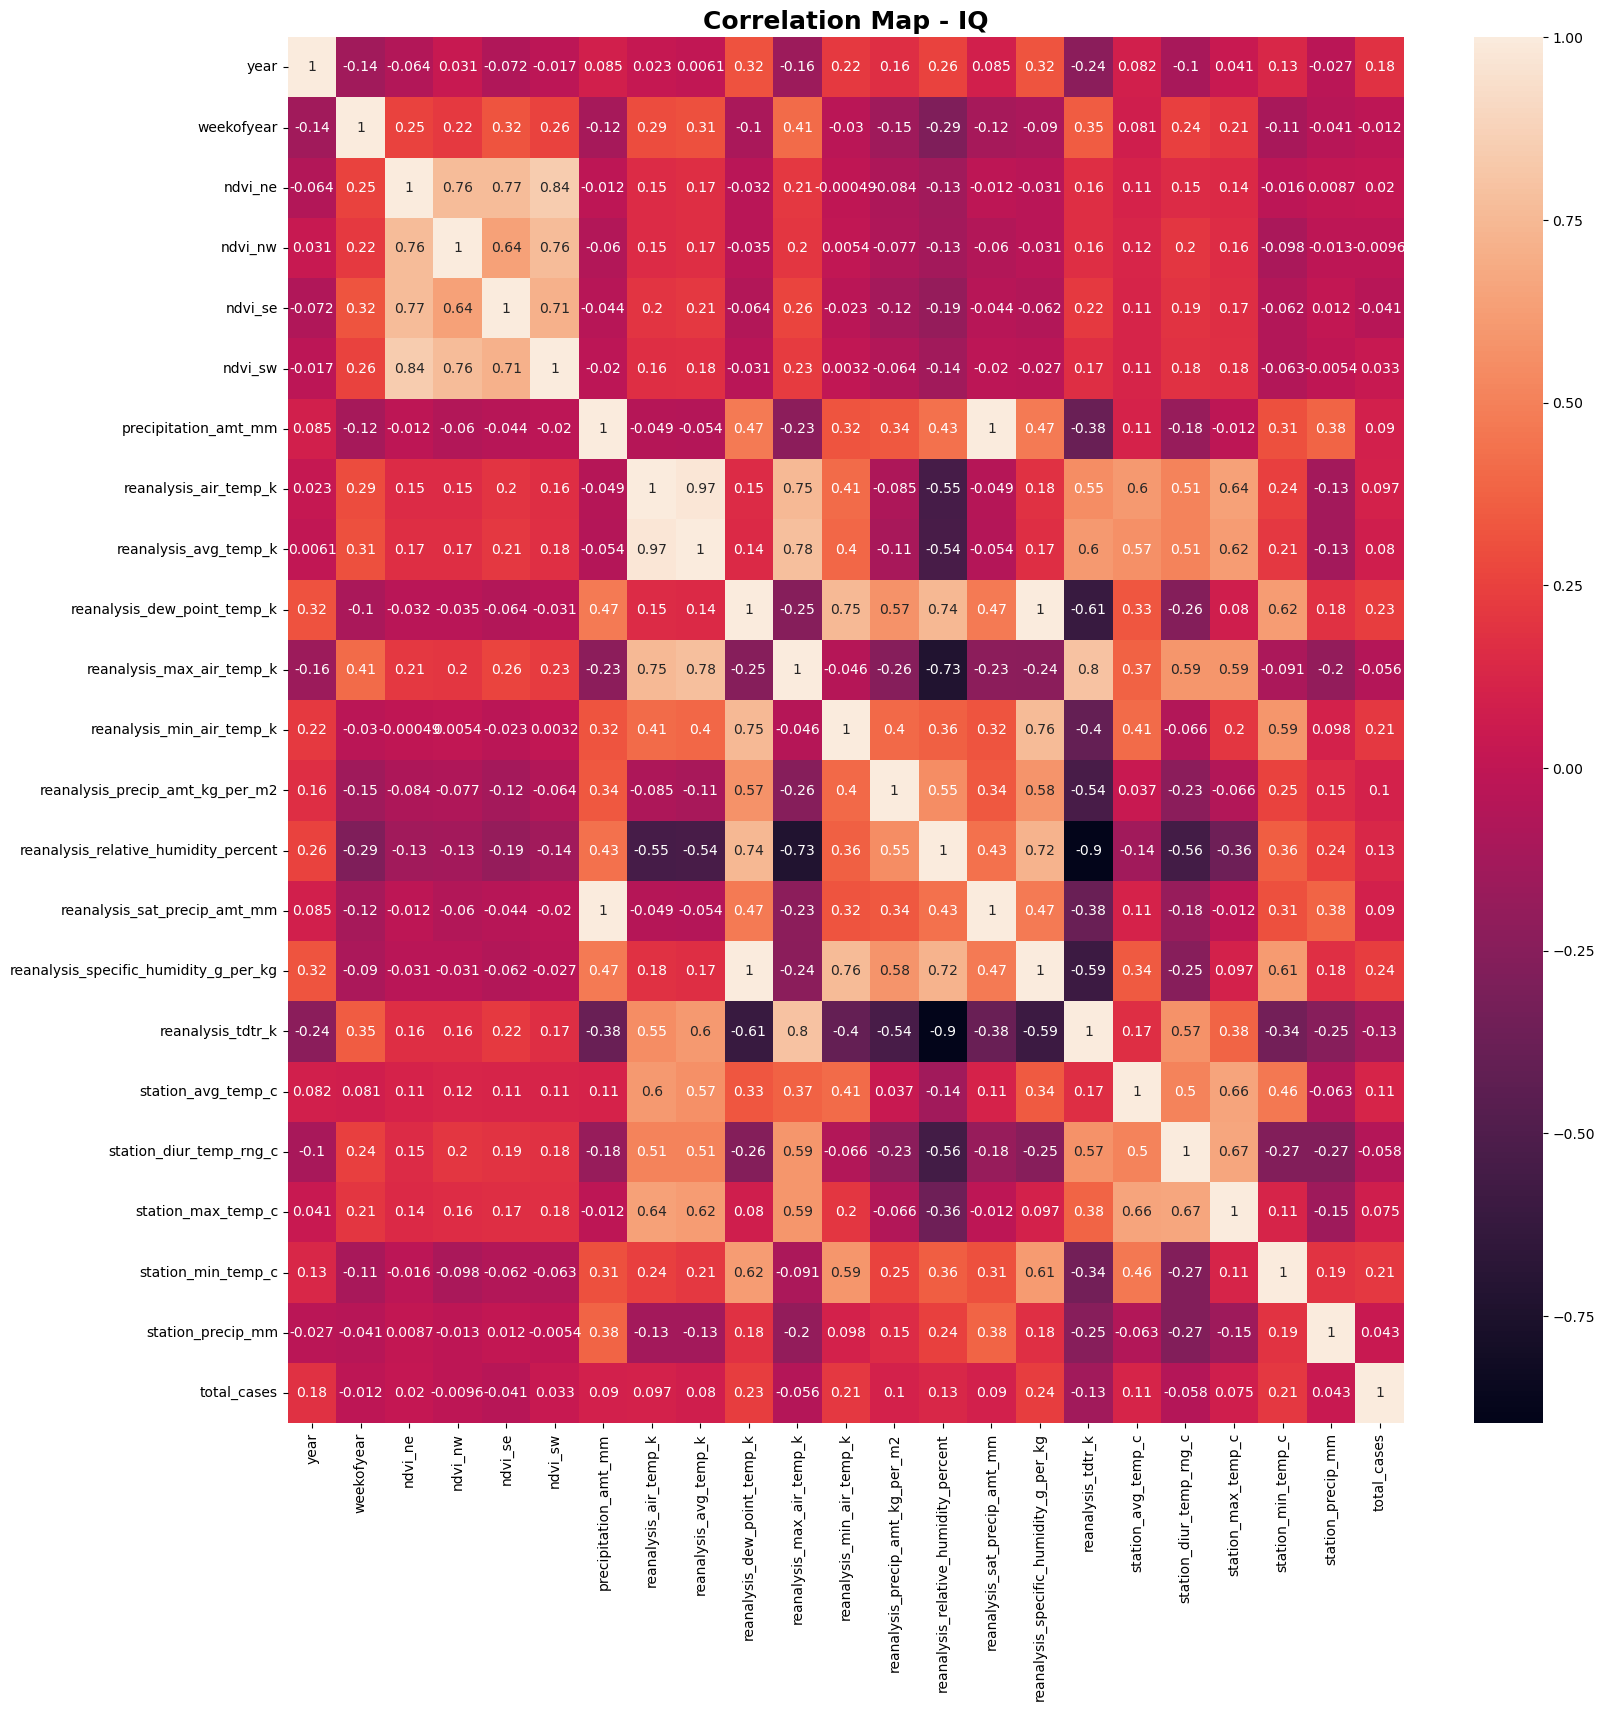

In [40]:
plt.figure(figsize = (18,18))
plt.title("Correlation Map - IQ", fontweight = 'bold', fontsize = 18)
sns.heatmap(iq_data.corr(),annot = True)
plt.show()

In [41]:
iq_data.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,295.807143,307.8,292.3,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4


In [42]:
iq_data.shape

(520, 25)

In [43]:
iq_data = iq_data.drop(['city','year','weekofyear','week_start_date'],axis = 1)

In [44]:
iq_data['ndvi_se'] = iq_data['ndvi_se'].fillna(method = 'ffill')
iq_data['ndvi_sw'] = iq_data['ndvi_sw'].fillna(method = 'ffill')
iq_data['ndvi_ne'] = iq_data['ndvi_ne'].fillna(method = 'ffill')
iq_data['ndvi_nw'] = iq_data['ndvi_nw'].fillna(method = 'ffill')

In [45]:
iq_data['reanalysis_air_temp_k'] = iq_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_avg_temp_k'] = iq_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_dew_point_temp_k'] = iq_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_max_air_temp_k'] = iq_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_min_air_temp_k'] = iq_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')

In [46]:
iq_data['avg_reanalysis'] = iq_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)
iq_data['avg_ndvi'] = iq_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [47]:
iq_data.isna().sum()

ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                      4
reanalysis_air_temp_k                     0
reanalysis_avg_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
total_cases                               0
avg_reanalysis                            0
avg_ndvi                        

In [48]:
iq_data.drop(['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
             'ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw'] ,
             axis = 1, inplace = True)

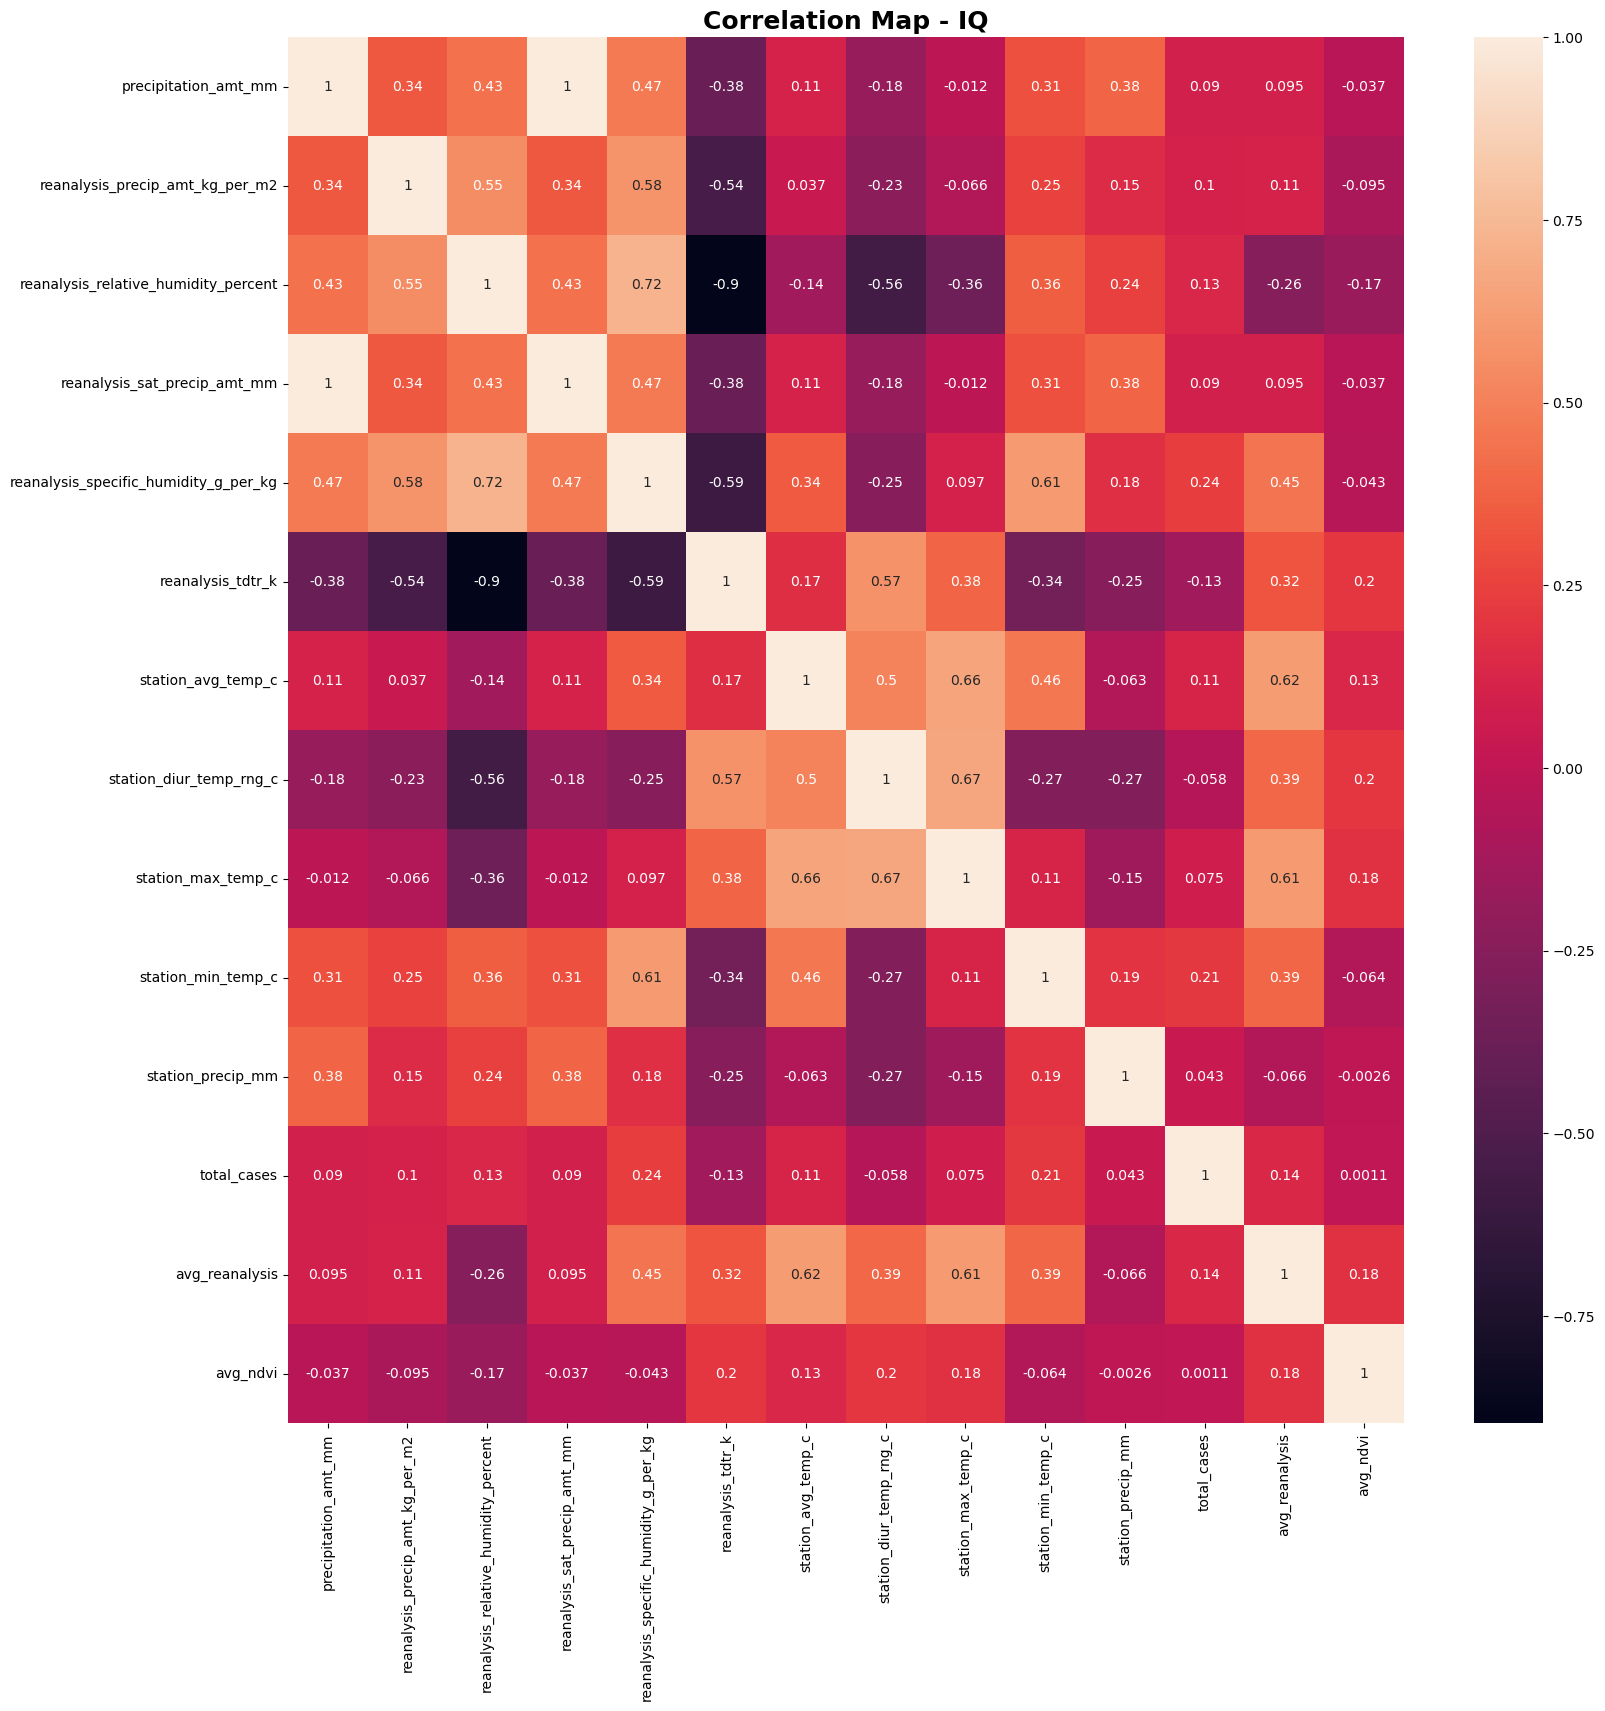

In [49]:
plt.figure(figsize = (18,18))
plt.title("Correlation Map - IQ", fontweight = 'bold', fontsize = 18)
sns.heatmap(iq_data.corr(),annot = True)
plt.show()

In [50]:
iq_data.drop(['reanalysis_precip_amt_kg_per_m2','reanalysis_sat_precip_amt_mm'] ,
             axis = 1, inplace = True)

In [51]:
iq_data.isna().sum()

precipitation_amt_mm                      4
reanalysis_relative_humidity_percent      4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
total_cases                               0
avg_reanalysis                            0
avg_ndvi                                  0
dtype: int64

In [52]:
iq_data['precipitation_amt_mm'] = iq_data['precipitation_amt_mm'].fillna(method = 'ffill')
iq_data['reanalysis_relative_humidity_percent'] = iq_data['reanalysis_relative_humidity_percent'].fillna(method = 'ffill')
iq_data['reanalysis_specific_humidity_g_per_kg'] = iq_data['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
iq_data['reanalysis_tdtr_k'] = iq_data['reanalysis_tdtr_k'].fillna(method = 'ffill')
iq_data['station_avg_temp_c'] = iq_data['station_avg_temp_c'].fillna(method = 'ffill')
iq_data['station_avg_temp_c'] = iq_data['station_avg_temp_c'].fillna(method = 'ffill')

iq_data['station_diur_temp_rng_c'] = iq_data['station_diur_temp_rng_c'].fillna(method = 'ffill')

iq_data['station_max_temp_c'] = iq_data['station_max_temp_c'].fillna(method = 'ffill')


iq_data['station_min_temp_c'] = iq_data['station_min_temp_c'].fillna(method = 'ffill')

iq_data['station_precip_mm'] = iq_data['station_precip_mm'].fillna(method = 'ffill')





In [53]:
from sklearn.model_selection import train_test_split

X = iq_data.drop('total_cases', axis = 1)
y = iq_data.total_cases

X_train, X_test, y_train, y_val  = train_test_split(X, y, test_size= 0.2)

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))


7.224230769230768


## IQ Select best features

In [163]:
## Select K-Best chi_square

X = iq_data.drop('total_cases', axis = 1)
y = iq_data.total_cases

Xcopy = X.copy()

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

print(X)

[[0.121 0.848 0.544 ... 0.006 0.516 0.343]
 [0.287 0.877 0.569 ... 0.102 0.435 0.409]
 [0.263 0.932 0.6   ... 0.07  0.387 0.206]
 ...
 [0.28  0.894 0.586 ... 0.014 0.419 0.322]
 [0.283 0.903 0.563 ... 0.029 0.407 0.505]
 [0.3   0.767 0.628 ... 0.038 0.61  0.467]]


In [164]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[5.105 2.788 4.69  6.089 0.868 3.274 2.384 1.677 5.919 2.663 2.868]
[[0.121 0.544 0.423 0.006]
 [0.287 0.569 0.536 0.102]
 [0.263 0.6   0.298 0.07 ]
 [0.027 0.278 0.439 0.055]
 [0.298 0.399 0.47  0.007]]


In [165]:
## Four best features are : 1,3,4,9.

Xcopy.head()

Xcopy.columns

Index(['precipitation_amt_mm', 'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'avg_reanalysis',
       'avg_ndvi'],
      dtype='object')

In [168]:
X.shape


(520, 4)

In [170]:
imp_feat = ['precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_precip_mm']


X = iq_data[imp_feat]
y = iq_data.total_cases

X_train = X[:400]
X_test = X[120:]
y_train = y[:400]
y_val  = y[120:]

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))

4.159224166666666


In [172]:
## Select K-Best f_regression

X = iq_data.drop('total_cases', axis = 1)
y = iq_data.total_cases

Xcopy = X.copy()

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [173]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression

# Feature extraction
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
print(sorted(fit.scores_))

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[4.174e+00 8.703e+00 3.026e+01 8.979e+00 6.873e+00 2.341e-01 3.331e+00
 2.223e+01 1.064e+00 9.817e+00 6.052e-04]
[0.0006052468168126191, 0.23409464240435396, 1.0643655095774218, 3.3312733853063374, 4.174381464170897, 6.8728762567808435, 8.703499061676512, 8.97945935180049, 9.816651525515292, 22.227975988282786, 30.256372462012386]
[[0.544 0.423 0.632 0.516]
 [0.569 0.536 0.642 0.435]
 [0.6   0.298 0.632 0.387]
 [0.278 0.439 0.    0.084]
 [0.399 0.47  0.463 0.387]]


In [174]:
## Four best features are : 3,8,10

Xcopy.head()

Xcopy.columns


Index(['precipitation_amt_mm', 'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'avg_reanalysis',
       'avg_ndvi'],
      dtype='object')

In [175]:
imp_feat = ['reanalysis_specific_humidity_g_per_kg','station_min_temp_c','avg_reanalysis']

X.shape

X = iq_data[imp_feat]
y = iq_data.total_cases

X_train = X[:400]
X_test = X[120:]
y_train = y[:400]
y_val  = y[120:]

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))


4.1904948214285715


In [176]:
##RFE

X = iq_data.drop('total_cases', axis = 1)
y = iq_data.total_cases

Xcopy = X.copy()

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [177]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = RandomForestRegressor()
rfe = RFE(estimator = model, n_features_to_select=3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 3
Selected Features: [False False  True  True False False False False  True False False]
Feature Ranking: [7 6 1 1 4 5 3 8 1 9 2]


In [178]:
Xcopy.head()

Xcopy.columns

Index(['precipitation_amt_mm', 'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'avg_reanalysis',
       'avg_ndvi'],
      dtype='object')

In [179]:


imp_feat = ['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg','station_precip_mm']

X.shape

X = iq_data[imp_feat]
y = iq_data.total_cases

X_train = X[:400]
X_test = X[120:]
y_train = y[:400]
y_val  = y[120:]

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_absolute_error(y_val, pred_rfr))



4.260932916666666


### Taking these three features in time series now
['reanalysis_specific_humidity_g_per_kg','station_min_temp_c','avg_reanalysis']

## Training on full dataset

## SJ

In [56]:
from sklearn.model_selection import train_test_split

X = sj_data.drop('total_cases', axis = 1)
y = sj_data.total_cases

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X)

In [57]:
test_feat = pd.read_csv('dengue_features_test.csv')
# test_label = pd.read_csv('submission_format.csv')
# data = pd.merge(df, df_label, on = ['city','year','weekofyear'], how = 'left')
test_feat.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [58]:
test_feat_sj = test_feat[test_feat['city'] == 'sj']
test_feat_iq = test_feat[test_feat['city'] == 'iq']

In [59]:
test_feat_sj['ndvi_se'] = test_feat_sj['ndvi_se'].fillna(method = 'ffill')
test_feat_sj['ndvi_sw'] = test_feat_sj['ndvi_sw'].fillna(method = 'ffill')
test_feat_sj['ndvi_ne'] = test_feat_sj['ndvi_ne'].fillna(method = 'ffill')
test_feat_sj['ndvi_nw'] = test_feat_sj['ndvi_nw'].fillna(method = 'ffill')

In [60]:
test_feat_sj['reanalysis_air_temp_k'] = test_feat_sj['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_feat_sj['reanalysis_avg_temp_k'] = test_feat_sj['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_feat_sj['reanalysis_dew_point_temp_k'] = test_feat_sj['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_feat_sj['reanalysis_max_air_temp_k'] = test_feat_sj['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_feat_sj['reanalysis_min_air_temp_k'] = test_feat_sj['reanalysis_min_air_temp_k'].fillna(method = 'ffill')


In [61]:
test_feat_sj['reanalysis_precip_amt_kg_per_m2'] = test_feat_sj['reanalysis_precip_amt_kg_per_m2'].fillna(method = 'ffill')
test_feat_sj['reanalysis_relative_humidity_percent'] = test_feat_sj['reanalysis_relative_humidity_percent'].fillna(method = 'ffill')
test_feat_sj['reanalysis_sat_precip_amt_mm'] = test_feat_sj['reanalysis_sat_precip_amt_mm'].fillna(method = 'ffill')
test_feat_sj['reanalysis_tdtr_k'] = test_feat_sj['reanalysis_tdtr_k'].fillna(method = 'ffill')
test_feat_sj['station_diur_temp_rng_c'] = test_feat_sj['station_diur_temp_rng_c'].fillna(method = 'ffill')
test_feat_sj['station_precip_mm'] = test_feat_sj['station_precip_mm'].fillna(method = 'ffill')






In [62]:
test_feat_sj['avg_reanalysis'] = test_feat_sj[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)
test_feat_sj['avg_ndvi'] = test_feat_sj[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [63]:
test_feat_sj.drop(['reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k',
              'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k'] ,
             axis = 1, inplace = True)
# iq_data.drop( , axis = 1, inplace = True)
test_feat_sj.drop(['ndvi_sw', 'ndvi_se','ndvi_ne','ndvi_nw', 'weekofyear', 'precipitation_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
              'station_min_temp_c', 'station_max_temp_c','station_avg_temp_c'] , axis = 1, inplace = True)
# iq_data.drop( , axis = 1, inplace = True)

In [64]:
test_feat_sj.drop(['city','year','week_start_date'] , axis = 1, inplace = True)

In [65]:
test_feat_sj.head()

,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,avg_reanalysis,avg_ndvi
0,25.37,78.781429,78.60,3.128571,7.057143,75.2,297.814000,0.039032
1,21.83,78.230000,12.56,2.571429,5.557143,34.3,297.785714,0.030989
2,4.12,78.270000,3.66,4.428571,7.785714,3.0,298.544286,0.057178
3,2.20,73.015714,0.00,4.342857,6.271429,0.3,298.744286,0.057162
4,4.36,74.084286,0.76,3.542857,7.085714,84.1,298.762286,0.058704


In [66]:
test_feat_sj.shape

(260, 8)

In [67]:
test_feat_sj.isna().sum()

reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_sat_precip_amt_mm            0
reanalysis_tdtr_k                       0
station_diur_temp_rng_c                 0
station_precip_mm                       0
avg_reanalysis                          0
avg_ndvi                                0
dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_test= sc.fit_transform(test_feat_sj)

In [69]:
# from sklearn.ensemble import RandomForestRegressor

# rfr = RandomForestRegressor(n_estimators= 100)
# rfr.fit(X_train, y)
# pred_rfr = rfr.predict(X_test)
# # print(mean_absolute_error(y, pred_rfr))

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 
                'max_depth': [5, 10, None], 
                'max_features': ['auto', 'log2','sqrt'], 
                'n_estimators': [10, 50, 100, 150, 200],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf' : [1, 2, 5, 10]
}

rfr_gc = RandomForestRegressor()

g_search = GridSearchCV(estimator = rfr_gc, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True, refit = True)

g_search.fit(X_train, y)
pred_rfr_gs = g_search.predict(X_test)

# print(g_search.best_params_)
# print(mean_absolute_error(y_val, pred_rfr_gs))

In [673]:
# pred_rfr

In [71]:
submi = pd.read_csv('submission_format.csv')

In [72]:
submi.tail()

,city,year,weekofyear,total_cases
411,iq,2013,22,0
412,iq,2013,23,0
413,iq,2013,24,0
414,iq,2013,25,0
415,iq,2013,26,0


In [73]:
submi_sj = submi[submi['city'] == 'sj']


In [74]:
submi_iq = submi[submi['city'] == 'iq']

In [75]:
submi_sj.shape

(260, 4)

In [76]:
submi_iq.shape

(156, 4)

In [77]:
submission_sj = pd.concat([submi_sj, pd.DataFrame(pred_rfr_gs)], axis=1)

In [78]:
submission_sj.head()

,city,year,weekofyear,total_cases,0
0,sj,2008,18,0,15.277929
1,sj,2008,19,0,13.697447
2,sj,2008,20,0,19.398184
3,sj,2008,21,0,15.419175
4,sj,2008,22,0,25.802108


In [79]:
submission_sj.shape

(260, 5)

## IQ

In [80]:
test_feat_iq = test_feat[test_feat['city'] == 'iq']

In [81]:
test_feat_iq['ndvi_se'] = test_feat_iq['ndvi_se'].fillna(method = 'ffill')
test_feat_iq['ndvi_sw'] = test_feat_iq['ndvi_sw'].fillna(method = 'ffill')
test_feat_iq['ndvi_ne'] = test_feat_iq['ndvi_ne'].fillna(method = 'ffill')
test_feat_iq['ndvi_nw'] = test_feat_iq['ndvi_nw'].fillna(method = 'ffill')
test_feat_iq['reanalysis_precip_amt_kg_per_m2'] = test_feat_iq['reanalysis_precip_amt_kg_per_m2'].fillna(method = 'ffill')
test_feat_iq['reanalysis_relative_humidity_percent'] = test_feat_iq['reanalysis_relative_humidity_percent'].fillna(method = 'ffill')
test_feat_iq['reanalysis_sat_precip_amt_mm'] = test_feat_iq['reanalysis_sat_precip_amt_mm'].fillna(method = 'ffill')
test_feat_iq['reanalysis_tdtr_k'] = test_feat_iq['reanalysis_tdtr_k'].fillna(method = 'ffill')
test_feat_iq['station_diur_temp_rng_c'] = test_feat_iq['station_diur_temp_rng_c'].fillna(method = 'ffill')
test_feat_iq['station_precip_mm'] = test_feat_iq['station_precip_mm'].fillna(method = 'ffill')


In [82]:
test_feat_iq['avg_reanalysis'] = test_feat_iq[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)
test_feat_iq['avg_ndvi'] = test_feat_iq[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)


In [83]:
test_feat_iq.drop(['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
             'ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw'] ,
             axis = 1, inplace = True)


In [84]:
test_feat_iq.drop(['city','year','week_start_date'] , axis = 1, inplace = True)

In [85]:
test_feat_iq.drop(['weekofyear'] , axis = 1, inplace = True)

In [86]:
test_feat_iq.drop(['reanalysis_precip_amt_kg_per_m2','reanalysis_sat_precip_amt_mm'] ,
             axis = 1, inplace = True)

In [87]:
test_feat_iq.isna().sum()

precipitation_amt_mm                      0
reanalysis_relative_humidity_percent      0
reanalysis_specific_humidity_g_per_kg     0
reanalysis_tdtr_k                         0
station_avg_temp_c                       10
station_diur_temp_rng_c                   0
station_max_temp_c                        1
station_min_temp_c                        7
station_precip_mm                         0
avg_reanalysis                            0
avg_ndvi                                  0
dtype: int64

In [88]:

test_feat_iq['station_avg_temp_c'] = test_feat_iq['station_avg_temp_c'].fillna(method = 'ffill')


test_feat_iq['station_max_temp_c'] = test_feat_iq['station_max_temp_c'].fillna(method = 'ffill')


test_feat_iq['station_min_temp_c'] = test_feat_iq['station_min_temp_c'].fillna(method = 'ffill')





In [89]:
iq_data.head()

,precipitation_amt_mm,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
936,25.41,92.418571,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0,298.154857,0.228307
937,60.61,93.581429,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0,297.624286,0.256012
938,55.52,95.848571,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0,297.306286,0.170504
939,5.60,87.234286,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0,295.316571,0.206918
940,62.76,88.161429,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0,297.305143,0.316546


In [90]:
from sklearn.model_selection import train_test_split

X_iq = iq_data.drop('total_cases', axis = 1)
y_iq = iq_data.total_cases
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_iq = sc.fit_transform(X_iq)

In [91]:
sc = StandardScaler()
X_test_iq = sc.fit_transform(test_feat_iq)

In [92]:
X_test_iq.shape

(156, 11)

In [730]:
# from sklearn.ensemble import RandomForestRegressor

# rfr_iq = RandomForestRegressor(n_estimators= 100)
# rfr_iq.fit(X_train_iq, y_iq)
# pred_rfr_iq = rfr_iq.predict(X_test_iq)

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 
                'max_depth': [5, 10, None], 
                'max_features': ['auto', 'log2','sqrt'], 
                'n_estimators': [10, 50, 100, 150, 200],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf' : [1, 2, 5, 10]
}

rfr_gc_iq = RandomForestRegressor()

g_search = GridSearchCV(estimator = rfr_gc_iq, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True, refit = True)

g_search.fit(X_train_iq, y_iq)
pred_rfr_gs_iq = g_search.predict(X_test_iq)

In [94]:
pred_rfr_gs_iq.shape

(156,)

In [95]:
submi_iq.shape

(156, 4)

In [96]:
df_iq_sub = pd.DataFrame(pred_rfr_gs_iq)

In [97]:
df_iq_sub.head()

,0
0,8.231576
1,2.824719
2,9.284624
3,3.235264
4,1.798982


In [98]:
df_iq_sub.shape

(156, 1)

In [99]:
submi_iq.reset_index(inplace=True)

In [100]:
submi_iq.head()

,index,city,year,weekofyear,total_cases
0,260,iq,2010,26,0
1,261,iq,2010,27,0
2,262,iq,2010,28,0
3,263,iq,2010,29,0
4,264,iq,2010,30,0


In [101]:
submi_iq.shape

(156, 5)

In [102]:
submission_iq = pd.concat([submi_iq,df_iq_sub], axis= 1)

In [103]:
submission_iq = submission_iq.drop(['index','total_cases'],axis = 1)

In [104]:
submission_iq.head()

,city,year,weekofyear,0
0,iq,2010,26,8.231576
1,iq,2010,27,2.824719
2,iq,2010,28,9.284624
3,iq,2010,29,3.235264
4,iq,2010,30,1.798982


In [105]:
submission_iq.rename(columns = {0:'total_cases'}, inplace = True)

In [106]:
submission_sj.head()

,city,year,weekofyear,total_cases,0
0,sj,2008,18,0,15.277929
1,sj,2008,19,0,13.697447
2,sj,2008,20,0,19.398184
3,sj,2008,21,0,15.419175
4,sj,2008,22,0,25.802108


In [107]:
submission_sj = submission_sj.drop(['total_cases'],axis = 1)

In [108]:
submission_sj.rename(columns = {0:'total_cases'}, inplace = True)

In [109]:
submission_sj.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,15.277929
1,sj,2008,19,13.697447
2,sj,2008,20,19.398184
3,sj,2008,21,15.419175
4,sj,2008,22,25.802108


In [125]:
submission_sj[submission_sj['total_cases']<0].count()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

In [110]:
submission_iq.head()

,city,year,weekofyear,total_cases
0,iq,2010,26,8.231576
1,iq,2010,27,2.824719
2,iq,2010,28,9.284624
3,iq,2010,29,3.235264
4,iq,2010,30,1.798982


In [111]:
submission_iq.shape

(156, 4)

In [131]:
submission_iq[submission_iq['total_cases']<=5].count()

city           42
year           42
weekofyear     42
total_cases    42
dtype: int64

In [112]:
submission_sj.shape

(260, 4)

In [113]:
main_submission = submission_sj.append(submission_iq)

In [114]:
main_submission.shape

(416, 4)

In [115]:
main_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 155
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         416 non-null    object 
 1   year         416 non-null    int64  
 2   weekofyear   416 non-null    int64  
 3   total_cases  416 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.2+ KB


In [116]:
main_submission.set_index('city',inplace=True)

In [117]:
main_submission_round = main_submission.copy()

In [118]:
main_submission_round.head()

,year,weekofyear,total_cases
city,,,
sj,2008,18,15.277929
sj,2008,19,13.697447
sj,2008,20,19.398184
sj,2008,21,15.419175
sj,2008,22,25.802108


In [119]:
main_submission_round['total_cases'] = main_submission_round['total_cases'].round(0)

In [120]:
main_submission_round.head()

,year,weekofyear,total_cases
city,,,
sj,2008,18,15.0
sj,2008,19,14.0
sj,2008,20,19.0
sj,2008,21,15.0
sj,2008,22,26.0


In [121]:
main_submission_round['total_cases'] = main_submission_round['total_cases'].astype('int64')

In [122]:
main_submission_round.head()

,year,weekofyear,total_cases
city,,,
sj,2008,18,15
sj,2008,19,14
sj,2008,20,19
sj,2008,21,15
sj,2008,22,26


In [123]:
main_submission_round.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, sj to iq
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   year         416 non-null    int64
 1   weekofyear   416 non-null    int64
 2   total_cases  416 non-null    int64
dtypes: int64(3)
memory usage: 13.0+ KB


In [124]:
main_submission_round.to_csv('submission_gs.csv')